In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
from random import randint
import shutil
from sklearn.metrics.pairwise import cosine_similarity
import sys 
from tqdm import tqdm

tqdm.pandas()

In [2]:
'''
def move_to_root_folder(root_path, cur_path):
    # Code from https://stackoverflow.com/questions/8428954/move-child-folder-contents-to-parent-folder-in-python
    for filename in os.listdir(cur_path):
        if os.path.isfile(os.path.join(cur_path, filename)):
            shutil.move(os.path.join(cur_path, filename), os.path.join(root_path, filename))
        elif os.path.isdir(os.path.join(cur_path, filename)):
            move_to_root_folder(root_path, os.path.join(cur_path, filename))
        else:
            sys.exit("Should never reach here.")

    # remove empty folders
    if cur_path != root_path:
        os.rmdir(cur_path)
        
move_to_root_folder(root_path='C:/Users/91730/Desktop/Alan K Alex/Kaggle codes/Similarity search/semantic_similarity/data/cv/fashion', cur_path='C:/Users/91730/Desktop/Alan K Alex/Kaggle codes/Similarity search/semantic_similarity/data/cv/fashion')
'''

'\ndef move_to_root_folder(root_path, cur_path):\n    # Code from https://stackoverflow.com/questions/8428954/move-child-folder-contents-to-parent-folder-in-python\n    for filename in os.listdir(cur_path):\n        if os.path.isfile(os.path.join(cur_path, filename)):\n            shutil.move(os.path.join(cur_path, filename), os.path.join(root_path, filename))\n        elif os.path.isdir(os.path.join(cur_path, filename)):\n            move_to_root_folder(root_path, os.path.join(cur_path, filename))\n        else:\n            sys.exit("Should never reach here.")\n\n    # remove empty folders\n    if cur_path != root_path:\n        os.rmdir(cur_path)\n        \nmove_to_root_folder(root_path=\'C:/Users/91730/Desktop/Alan K Alex/Kaggle codes/Similarity search/semantic_similarity/data/cv/fashion\', cur_path=\'C:/Users/91730/Desktop/Alan K Alex/Kaggle codes/Similarity search/semantic_similarity/data/cv/fashion\')\n'

In [3]:


img_path = "C:/Users/91730/Desktop/Alan K Alex/Kaggle codes/Similarity search/semantic_similarity/data/cv/fashion"

images = [
        
       f'C:/Users/91730/Desktop/Alan K Alex/Kaggle codes/Similarity search/semantic_similarity/data/cv/fashion/{f}'
    
       for f in os.listdir(img_path)
       if os.path.isfile(os.path.join(img_path,f))
    
    
         ]


image_df = pd.DataFrame(images,columns=['img_path'])

print(image_df)

image_df.head()

                                               img_path
0     C:/Users/91730/Desktop/Alan K Alex/Kaggle code...
1     C:/Users/91730/Desktop/Alan K Alex/Kaggle code...
2     C:/Users/91730/Desktop/Alan K Alex/Kaggle code...
3     C:/Users/91730/Desktop/Alan K Alex/Kaggle code...
4     C:/Users/91730/Desktop/Alan K Alex/Kaggle code...
...                                                 ...
6234  C:/Users/91730/Desktop/Alan K Alex/Kaggle code...
6235  C:/Users/91730/Desktop/Alan K Alex/Kaggle code...
6236  C:/Users/91730/Desktop/Alan K Alex/Kaggle code...
6237  C:/Users/91730/Desktop/Alan K Alex/Kaggle code...
6238  C:/Users/91730/Desktop/Alan K Alex/Kaggle code...

[6239 rows x 1 columns]


,img_path
0,C:/Users/91730/Desktop/Alan K Alex/Kaggle code...
1,C:/Users/91730/Desktop/Alan K Alex/Kaggle code...
2,C:/Users/91730/Desktop/Alan K Alex/Kaggle code...
3,C:/Users/91730/Desktop/Alan K Alex/Kaggle code...
4,C:/Users/91730/Desktop/Alan K Alex/Kaggle code...


## Towhee Pipelines

In [4]:
!pip install towhee torch torchvision

In [5]:
from towhee import pipeline

embedding_pipeline = pipeline('image-embedding')

In [6]:

image_df['towhee_img_embedding']=image_df['img_path'].progress_apply(lambda x:np.squeeze(embedding_pipeline(x)))

image_df.head()

100%|██████████████████████████████████████████████████████████████████████████████| 6239/6239 [43:58<00:00,  2.37it/s]


,img_path,towhee_img_embedding
0,C:/Users/91730/Desktop/Alan K Alex/Kaggle code...,"[0.0, 0.13571438, 0.07747779, 0.0, 0.06867723,..."
1,C:/Users/91730/Desktop/Alan K Alex/Kaggle code...,"[0.020778598, 0.09365222, 0.10665407, 0.051480..."
2,C:/Users/91730/Desktop/Alan K Alex/Kaggle code...,"[0.0, 0.017002566, 0.0101805935, 0.00038356014..."
3,C:/Users/91730/Desktop/Alan K Alex/Kaggle code...,"[0.0, 0.032862574, 0.0, 0.0, 0.16102254, 0.0, ..."
4,C:/Users/91730/Desktop/Alan K Alex/Kaggle code...,"[0.07896162, 0.0087613, 0.06798893, 0.0, 0.055..."


## Helper function to find similar images

In [7]:
def plot_similar(df,embedding_col,query_index,k_neighbors=5):
    
    similarities = cosine_similarity([df[embedding_col][query_index]],df[embedding_col].values.tolist())[0]
    
    
    k = k_neighbors+1
    nearest_indices = np.argpartition(similarities,-k)[-k:]
    
    nearest_indices = nearest_indices[nearest_indices != query_index]
    
    img = Image.open(df['img_path'][query_index]).convert('RGB')
    plt.imshow(img)
    plt.title(f'Query Product.\nIndex: {query_index}')
    
    fig=plt.figure(figsize=(20,4))
    plt.suptitle('Similar Products')
    
    for idx,neighbor in enumerate(nearest_indices):
        
        plt.subplot(1,len(nearest_indices),idx+1)
        img = Image.open(df['img_path'][neighbor]).convert('RGB')
        
        plt.imshow(img)
        plt.title(f'Cosine Sim: {similarities[neighbor]:.3f}')
        
    
    plt.tight_layout()
        
        

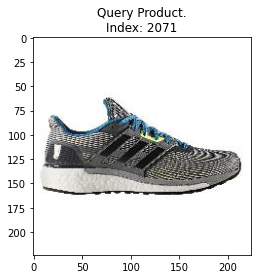

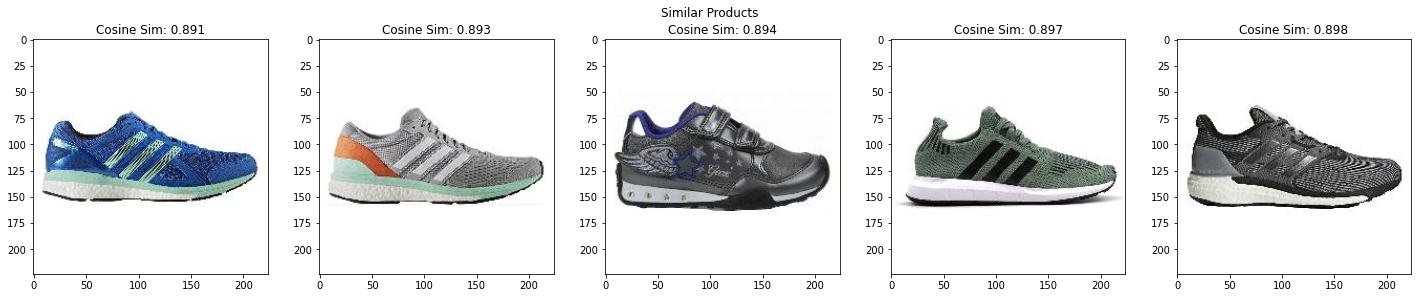

In [96]:
plot_similar(df=image_df,embedding_col='towhee_img_embedding',query_index=randint(0,len(image_df)),k_neighbors=5)

In [9]:
#862 index of hat

#2004 index of slipper


!pip install lightning-bolts

In [10]:

from pl_bolts.models.self_supervised import SimCLR
import torch

from torch.utils.data import Dataset,DataLoader
from torchvision import io,transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



In [11]:
device

device(type='cpu')

In [12]:

weight_path ='https://pl-bolts-weights.s3.us-east-2.amazonaws.com/simclr/bolts_simclr_imagenet/simclr_imagenet.ckpt'

simclr = SimCLR.load_from_checkpoint(weight_path,strict=False,batch_size=32)


simclr_resnet50 = simclr.encoder.to(device)

simclr_resnet50.eval();


In [13]:


#Create dataset from pytorch

class FashionImageDataset(Dataset):
    
    def __init__(self,df,transform=None):
        self.df=df
        self.transform=transform
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self,idx):
        #Load the image
        
        img_path = self.df.loc[idx,'img_path']
        image = io.read_image(img_path,mode=io.image.ImageReadMode.RGB)/255
        
        # Apply Transformations
        
        if self.transform:
            
            image = self.transform(image)
            
        return image
    
    
transformations = transforms.Compose([transforms.Normalize((0.485,0.456,0.406),(0.229,0.224,0.225)),transforms.Resize(size=(64,64))])

emb_dataset = FashionImageDataset(df=image_df,transform=transformations)

emb_dataloader = DataLoader(emb_dataset,batch_size=32)

In [14]:



embeddings = []

for batch in tqdm(emb_dataloader):
    
    batch=batch.to(device)
    embeddings+=simclr_resnet50(batch)[0].tolist()
    
image_df['simclr_img_embeddings'] = embeddings
image_df.head()

100%|████████████████████████████████████████████████████████████████████████████████| 195/195 [03:07<00:00,  1.04it/s]


,img_path,towhee_img_embedding,simclr_img_embeddings
0,C:/Users/91730/Desktop/Alan K Alex/Kaggle code...,"[0.0, 0.13571438, 0.07747779, 0.0, 0.06867723,...","[0.0, 0.0, 0.0, 0.016052447259426117, 0.067167..."
1,C:/Users/91730/Desktop/Alan K Alex/Kaggle code...,"[0.020778598, 0.09365222, 0.10665407, 0.051480...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,C:/Users/91730/Desktop/Alan K Alex/Kaggle code...,"[0.0, 0.017002566, 0.0101805935, 0.00038356014...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,C:/Users/91730/Desktop/Alan K Alex/Kaggle code...,"[0.0, 0.032862574, 0.0, 0.0, 0.16102254, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.10626209527254105, 0.0,..."
4,C:/Users/91730/Desktop/Alan K Alex/Kaggle code...,"[0.07896162, 0.0087613, 0.06798893, 0.0, 0.055...","[0.0, 0.0, 0.0, 0.0, 0.014906682074069977, 0.0..."


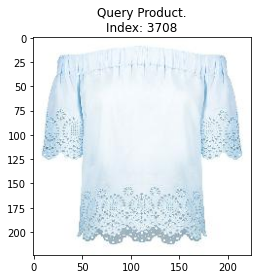

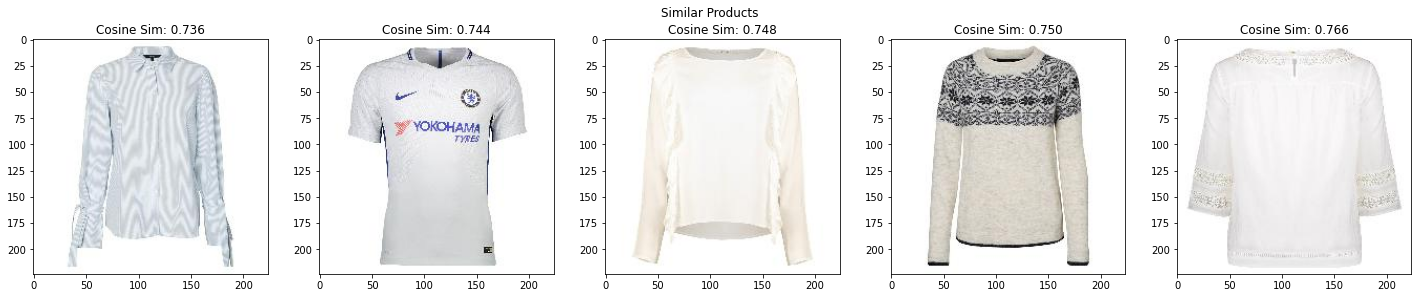

In [98]:
plot_similar(df=image_df,embedding_col='simclr_img_embeddings',query_index=randint(0,len(image_df))
             ,k_neighbors=5)

In [16]:
!pip install sentence_transformers ftfy

In [17]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('clip-ViT-B-32')


In [18]:

clip_embeddings = []

step = 10_000

for idx in range(0,len(image_df),step):
    
    images=[Image.open(img_path).convert('RGB') for img_path in image_df['img_path'].iloc[idx:idx+step]]
    
    
    clip_embeddings.extend(model.encode(images,show_progress_bar=True).tolist())
    

    image_df['clip_img_embedding']=clip_embeddings
    
    image_df.head()

Batches:   0%|          | 0/195 [00:00<?, ?it/s]

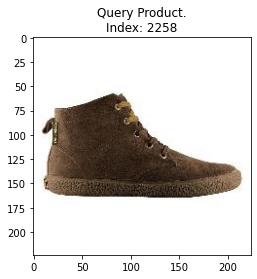

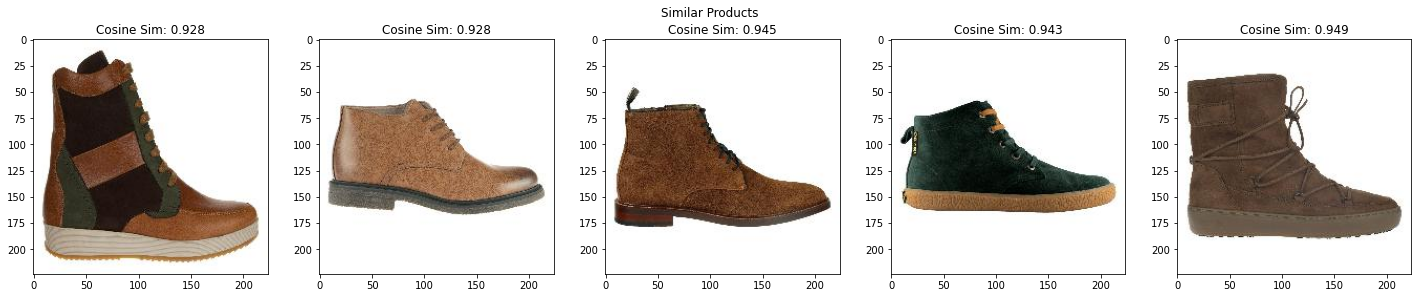

In [19]:
plot_similar(df=image_df,embedding_col='clip_img_embedding',query_index=randint(0,len(image_df))
             ,k_neighbors=5)

In [20]:
def text_image_search(text_query,df,img_emb_col,k=5):
    
    
    text_emb = model.encode(text_query).tolist()
    
    similarities = cosine_similarity([text_emb],df[img_emb_col].values.tolist())[0]
    
    nearest_indices = np.argpartition(similarities,-k)[-k:]
    
    print(f'Query Text: {text_query}')
    
    fig = plt.figure(figsize=(20,4))
    
    plt.suptitle('Similar Products')
    
    for idx,neighbor in enumerate(nearest_indices):
        
        plt.subplot(1,len(nearest_indices),idx+1)
        
        img = Image.open(df['img_path'][neighbor]).convert('RGB')
        
        plt.imshow(img)
        
        plt.title(f'Cosine Sim :{similarities[neighbor]:.3f}')
        
    plt.tight_layout()

paris saint germain
Query Text: paris saint germain


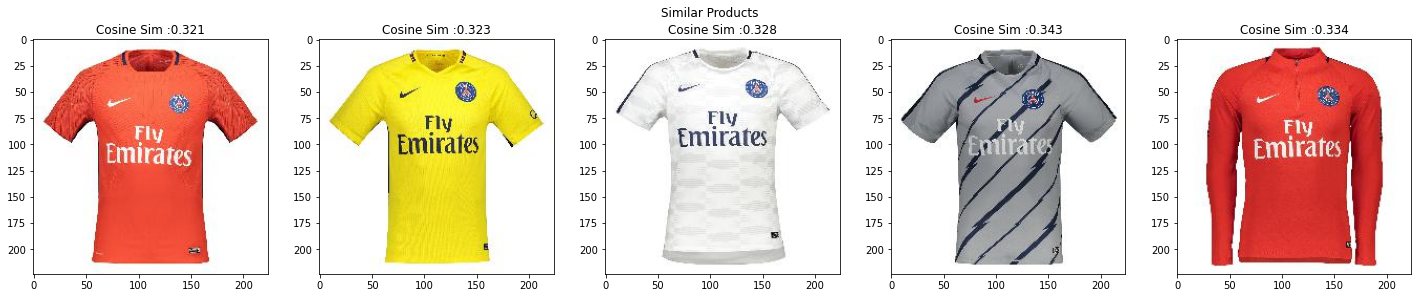

In [110]:
text_query = input()

text_image_search(text_query,df=image_df,img_emb_col='clip_img_embedding',k=5)
